## Problem Statement

Understanding how employees are compensated in San Francisco, including their base salary, overtime, and additional benefits, is essential for budget allocation. However, the data on employee compensation can be complex and includes various factors that contribute to the total pay. This project aims to unravel these complexities, identify trends, and ensure a better understanding of how pay is structured across different roles.

## Objective

The objective of this project is to analyze and uncover insights from the compensation data of San Francisco city employees. Through data analysis and visualization, we aim to understand how different pay components (like BasePay, OvertimePay, and Benefits) contribute to overall compensation. Additionally, we will explore trends in the data over time and identify high-paying roles. The goal is to build a predictive model that can estimate total compensation based on available data, offering a deeper understanding of how employees are paid.

## Importing Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
df = pd.read_csv('Total.csv')

In [3]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011


In [4]:
df.tail()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
312877,Daniel W Plautz,Public Service Trainee,0.0,0.0,0.0,0.0,0.0,0.0,2018
312878,David J Thompson,Deputy Sheriff,0.0,0.0,0.0,0.0,0.0,0.0,2018
312879,Keiko Weng Yee Lau,Public Service Trainee,0.0,0.0,0.0,0.0,0.0,0.0,2018
312880,David Wong,Deputy Sheriff,0.0,0.0,0.0,0.0,0.0,0.0,2018
312881,Debora E Howard,Recreation Leader,0.0,0.0,0.0,0.0,0.0,0.0,2018


## Exploratory Data Analysis

### Shape of the Dataset

In [5]:
df.shape

(312882, 9)

#### Observation:

The dataset contains 312,882 employee records with 9 columns of salary-related information for each.


### Columns

In [6]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

### Basic Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB


#### Observation: 

The dataset has 6 columns stored as objects (like BasePay,OvertimePay,OtherPay etc) that should be converted to numeric types, while EmployeeName and JobTitle are correctly stored as strings, and Year is correctly stored as an integer.


In [8]:
columns_to_convert = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')


### Statistical Summary

In [9]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,312276.000000,312881.000000,312881.000000,276722.000000,312882.000000,312882.000000,312882.000000
mean,69808.257496,5668.929393,3460.694974,25016.917292,78802.645788,100928.339777,2014.625303
std,45376.929428,12745.655309,7387.263120,15089.077103,53230.758542,66485.186495,2.290899
min,-474.400000,-292.800000,-7058.590000,-13939.420000,-618.130000,-3628.780000,2011.000000
25%,35722.365000,0.000000,0.000000,12729.762500,38803.000000,48955.072500,2013.000000
50%,67710.450000,0.000000,728.000000,28327.330000,74908.790000,100011.290000,2015.000000
75%,99312.302500,5223.120000,3958.680000,35268.162500,111386.897500,142376.300000,2017.000000
max,592394.340000,309481.030000,400184.250000,125891.730000,592394.340000,712802.360000,2018.000000


### Checking for Null Values

In [10]:
df.isnull().sum()

EmployeeName            0
JobTitle                0
BasePay               606
OvertimePay             1
OtherPay                1
Benefits            36160
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

### Handling Null Values

In [11]:
df_cleaned = df.dropna(subset=['BasePay', 'Benefits'])

#### Observation:

We removed rows with missing BasePay or Benefits to keep the data clean and reliable for analysis.


### Checking for Outliers

In [12]:
df_cleaned.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,276117.000000,276117.000000,276117.000000,276117.000000,276117.000000,276117.000000,276117.000000
mean,70621.791582,5830.348157,3438.137903,25060.072463,79890.277641,104950.350104,2015.103612
std,45908.600575,13014.397091,7285.200937,15076.283829,53805.549905,67579.288482,1.997828
min,-474.400000,-292.800000,-7058.590000,-13939.420000,-618.130000,-3628.780000,2012.000000
25%,36083.880000,0.000000,0.000000,12935.090000,39604.480000,53091.930000,2013.000000
50%,68432.810000,0.000000,720.000000,28347.670000,75986.010000,104454.640000,2015.000000
75%,100674.000000,5412.660000,3953.740000,35285.920000,112794.900000,148009.380000,2017.000000
max,592394.340000,309481.030000,342802.630000,125891.730000,592394.340000,712802.360000,2018.000000


#### Observation:

BasePay, TotalPay, and TotalPayBenefits vary a lot, with some very high values that may be outliers.


### Handling Outliers

In [13]:
Q1 = df_cleaned['BasePay'].quantile(0.25)
Q3 = df_cleaned['BasePay'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_cleaned[(df_cleaned['BasePay'] < (Q1 - 1.5 * IQR)) | (df_cleaned['BasePay'] > (Q3 + 1.5 * IQR))]

outliers[['EmployeeName', 'JobTitle', 'BasePay']]


,EmployeeName,JobTitle,BasePay
36160,Gregory Suhr,Chief of Police,302578.00
36162,Joanne Hayes-White,"Chief, Fire Department",296943.01
36164,Amy Hart,Dept Head V,271607.74
36165,Edward Reiskin,"Gen Mgr, Public Trnsp Dept",294000.17
36166,John Martin,Dept Head V,287747.89
...,...,...,...
272521,Anne M Ruggels,Manager VI,198816.01
272550,Bruce A Robertson,Manager VI,198344.02
272560,Abbie S Yant,Dept Head III,197805.53
272594,Mitchell J Sutton,Manager V,197600.33


#### Observation:

We used the IQR method to treat the outliers in BasePay—values too far from the typical range are marked as outliers.


In [14]:
df[df['BasePay']<0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
72832,Irwin Sidharta,Junior Clerk,-166.01,249.02,0.00,6.56,83.01,89.57,2012
72865,Robert Scott,Junior Clerk,-121.63,182.70,0.00,5.44,61.07,66.51,2012
72872,Chung Huey Kung,Junior Clerk,-109.22,163.83,0.00,4.32,54.61,58.93,2012
72874,Jordan Li,Junior Clerk,-106.60,159.90,0.00,4.66,53.30,57.96,2012
72878,Richard Jackson,Junior Clerk,-101.88,153.08,0.00,4.55,51.20,55.75,2012
72884,DiMarco McGhee-Stewart,Junior Clerk,-93.14,139.97,0.00,4.17,46.83,51.00,2012
72888,Leopoldo Marasigan,Junior Clerk,-87.38,131.06,0.00,3.89,43.68,47.57,2012
72894,Douglas Avalos,Junior Clerk,-75.67,113.76,0.00,3.39,38.09,41.48,2012
72908,Norma Rodriguez,Junior Clerk,-59.59,89.65,0.00,2.68,30.06,32.74,2012
72920,Charles Williams,Junior Clerk,-30.58,45.87,0.00,1.36,15.29,16.65,2012


#### Looking into salary details and trends for the employee named "Ricardo Jimenez"


In [15]:
ricardo_data = df[df['EmployeeName']=='Ricardo Jimenez']
ricardo_data

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
50596,Ricardo Jimenez,Transit Supervisor,72936.93,8078.04,3701.18,31355.90,84716.15,116072.05,2012
120452,Ricardo Jimenez,Transit Supervisor,89128.98,14206.09,2677.35,33912.52,106012.42,139924.94,2014
160317,Ricardo Jimenez,Transit Supervisor,89623.29,8757.50,2556.00,32716.82,100936.79,133653.61,2015
198692,Ricardo Jimenez,Transit Supervisor,97131.01,10767.28,2572.50,33947.81,110470.79,144418.60,2016
240214,Ricardo Jimenez,Transit Supervisor,100900.50,8531.81,2838.00,35989.91,112270.31,148260.22,2017
299079,Ricardo Jimenez,Transit Supervisor,61286.00,2780.30,1417.50,22218.57,65483.80,87702.37,2018


### Visualize Ricardo Jimenez's TotalPayBenefits over the years

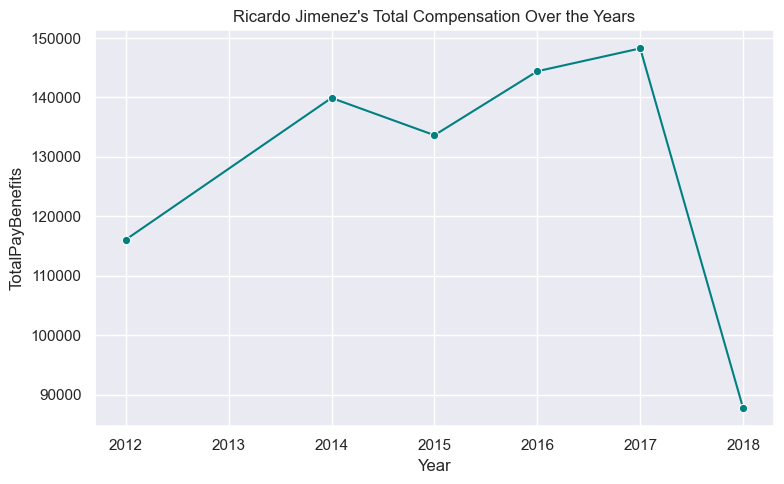

In [16]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=ricardo_data, x='Year', y='TotalPayBenefits', marker='o', color='teal')
plt.title("Ricardo Jimenez's Total Compensation Over the Years")
plt.xlabel("Year")
plt.ylabel("TotalPayBenefits")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Observation:

From 2012 to 2017, Ricardo Jimenez's total compensation (TotalPayBenefits) steadily increased, reaching a peak in 2017. However, in 2018, there was a sharp drop in pay, likely due to reduced base pay or benefits that year.


### Visualizing Salary Trends by Year

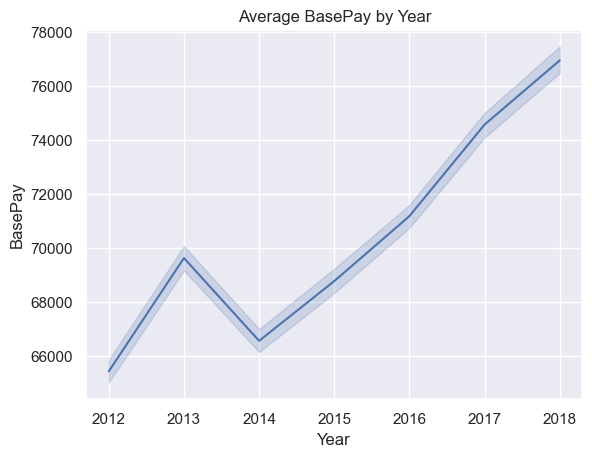

In [17]:
sns.lineplot(data=df_cleaned, x='Year', y='BasePay')
plt.title('Average BasePay by Year')
plt.show()


### Observation:

The line plot indicates that average salaries are steadily increasing over time.

### Top 5 Job Titles by Frequency

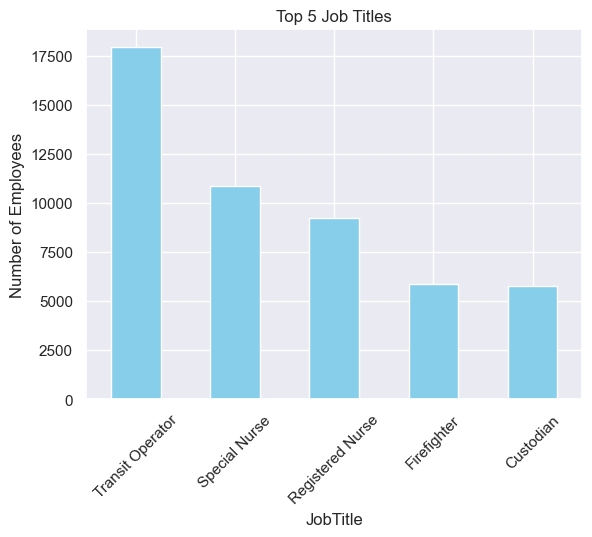

In [18]:
top_job_titles = df_cleaned['JobTitle'].value_counts().head(5)
top_job_titles.plot(kind='bar', color='skyblue')
plt.title('Top 5 Job Titles')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


#### Observation:

The top job titles in San Francisco's public sector include Transit Operators, Nurses, Firefighters, and Custodians.

### Top 10 Highest Paying Job Titles

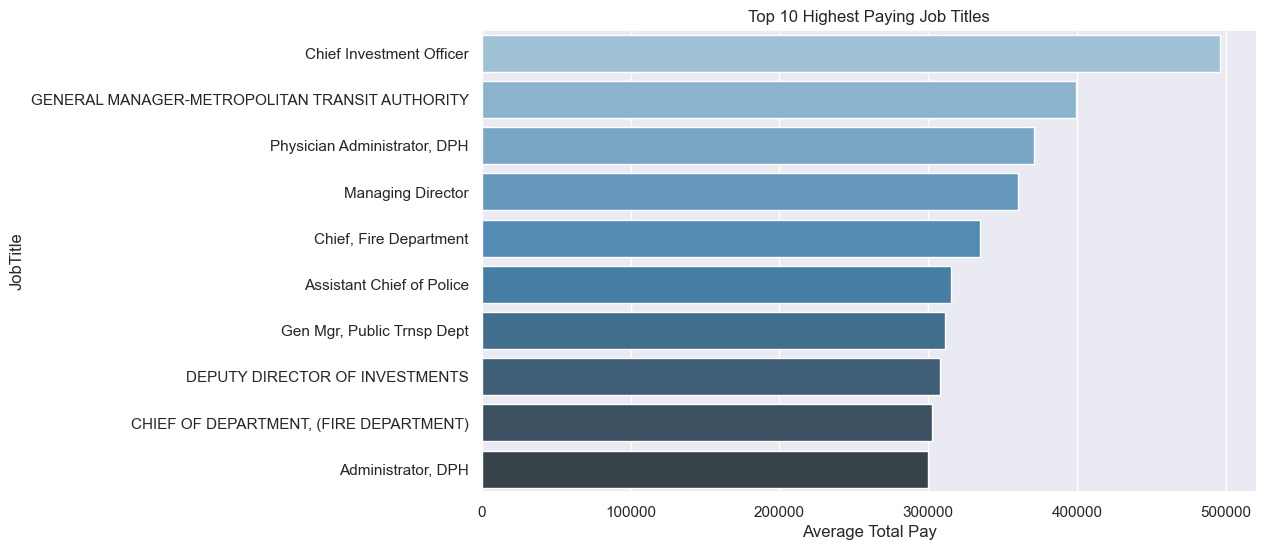

In [19]:
job_salary =df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=job_salary.values, y=job_salary.index,
palette='Blues_d')
plt.title('Top 10 Highest Paying Job Titles')
plt.xlabel('Average Total Pay')
plt.show()


#### Observation:

The top 10 highest paying job titles have significantly higher average total pay, often held by high-ranking or specialized roles.


### Salary Distribution

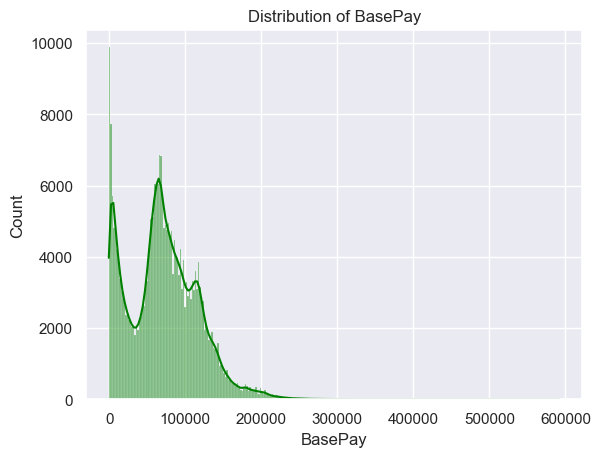

In [20]:
sns.histplot(df_cleaned['BasePay'], kde=True, color='green')
plt.title('Distribution of BasePay')
plt.xlabel('BasePay')
plt.show()


#### Observation:

Most employees earn lower to moderate salaries, and a few employees earn significantly higher salaries.

### Distribution of BasePay, OvertimePay, and OtherPay

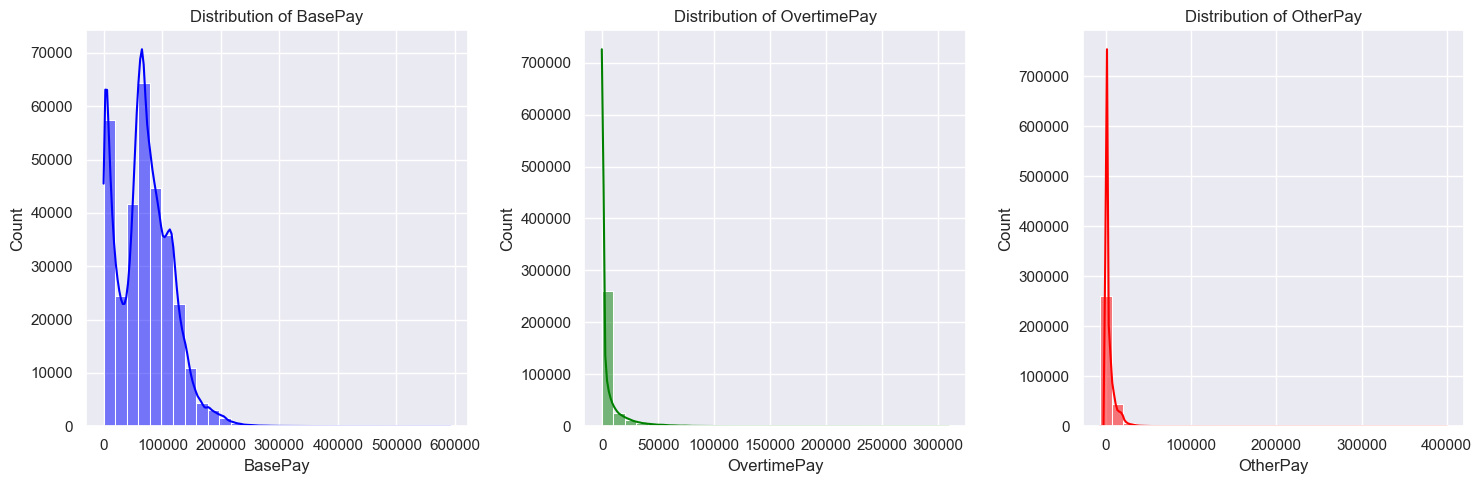

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(df['BasePay'], bins=30, kde=True, color='blue')
plt.title('Distribution of BasePay')

plt.subplot(1,3,2)
sns.histplot(df['OvertimePay'], bins=30, kde=True,
color='green')
plt.title('Distribution of OvertimePay')

plt.subplot(1,3,3)
sns.histplot(df['OtherPay'], bins=30, kde=True, color='red')
plt.title('Distribution of OtherPay')

plt.tight_layout()
plt.show()


#### Observation:

The charts show that most employees earn lower amounts for BasePay, OvertimePay, and OtherPay, with a small number of employees earning significantly higher pay.


### Correlation Heatmap

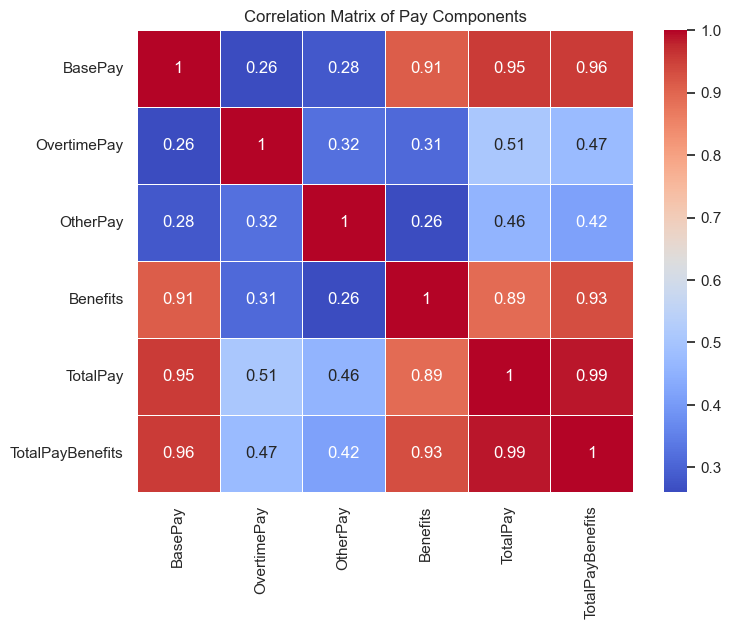

In [22]:
plt.figure(figsize=(8,6))
corr_matrix = df[['BasePay', 'OvertimePay', 'OtherPay','Benefits', 'TotalPay', 'TotalPayBenefits']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
linewidths=0.5)
plt.title('Correlation Matrix of Pay Components')
plt.show()


#### Observation:

The heatmap reveals strong positive correlations between TotalPay and TotalPayBenefits, and moderate correlations between BasePay and TotalPay.


## Data Preprocessing

In [23]:
# One-hot encoding for categorical variables like 'JobTitle'

df_model = pd.get_dummies(df_cleaned, columns=['JobTitle'], drop_first=True)

### Feature scaling

In [24]:
scaler = StandardScaler()
df_model[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']] = scaler.fit_transform(df_model[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']])

### Split data into Independent and Dependent Variable

In [25]:
X = df_model.drop(columns=['EmployeeName', 'TotalPayBenefits'])
y = df_model['TotalPayBenefits']

### Split data into training and testing sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Training a Linear Regression Model

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

### Model Evaluation

In [29]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 7.306409854662031e-07
R-squared: 1.0


## Conclusion

### Key Insights from EDA

1.BasePay (the main salary) is the biggest part of what employees earn, but extra pay like overtime and benefits also add up for many.

2.People with top jobs like CEO, Fire Chief, and Police Captain earn the highest average salaries.

3.Some salary numbers look too high or even negative, which could be mistakes or special cases in the data.

4.Salaries have gone up over the years, showing a general increase in pay from 2011 to 2018.

5.The main salary (BasePay) is closely connected to the overall pay, so it's a good predictor of how much someone earns in total.


We used a Linear Regression model to predict employee total compensation based on features like BasePay, OvertimePay, and Benefits. The model performed very well, with accurate predictions and strong results. This shows that salary components like base salary and extra pay can be used effectively to estimate overall pay.


In [33]:
import pickle

# Save the model to a file
with open('salary_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [34]:
with open('salary_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


### THANK YOU